In [3]:
# 도미의 길이, 무게 리스트 35개
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어의 길이와 무게 리스트 14개
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


import matplotlib.pyplot as plt    # 그래프 그림을 그릴때 쓰는 라이브러리 호출(맷플롯립 )
from sklearn.neighbors import KNeighborsClassifier     # K-최근접 이웃 분류 알고리즘 호출(사이킷런 머신러닝 패키지)

All_fish_length=bream_length + smelt_length
All_fish_weight=bream_weight + smelt_weight
All_fish_answer = [1]*35+[0]*14    # Superviser 학습을 위한 정답지 만들기 (1이면 도미, 0이면 빙어이다.)
All_data = [[a,b] for a,b in zip(All_fish_length, All_fish_weight)]    # 사이킷런 활용을 위한 2차원 리스트 쌍 [[길이,무게], [길이,무게]...]

kn = KNeighborsClassifier()    # K-최근접 이웃분류 클래스 인스턴스화 하기 (n_neighbors=15를 클래스 괄호 안에 넣어주면 이웃체크수 15개로 변경 가능)
kn.fit(All_data[:35], All_fish_answer[:35])    # 학습셋 35개 
kn.score(All_data[36:], All_fish_answer[36:])    # 테스트셋 14개 설정

0.0

## numpy 라이브러리 사용

In [4]:
import numpy as np
input_arr = np.array(All_data)     # 파이썬 리스트를 넘파이로 변환
target_arr = np.array(All_fish_answer)    # 파이썬 리스트를 넘파이로 변환

print(input_arr.shape)    # 샘플개수, 특성개수 출력

(49, 2)


## 학습셋과 테스트셋을 골고루 섞어서 샘플링 편향을 방지한다.

In [40]:
np.random.seed(42)    #항상 동일한 결과를 출력하기 위해서 시드번호를 부여한다.(시드번호 있으면 항상 고정된 랜덤배열이 생성)
index = np.arange(49)    # 0부터 48까지의 정수가 담긴 배열을 생성한다.
np.random.shuffle(index)    #넘파이 배열을 섞는다.

print(index)

mlist =[0,1,2]
print(input_arr[mlist])    # 넘파이 배열은 이렇게 원하는 인덱스번호가 담긴 리스트를 넣으면 알아서 해당 인덱스 번호만 뽑아준다.

# 학습셋 만들기    (49개중 35개를 학습셋으로 사용)
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 테스트셋 만들기    (49개중 14개를 테스트셋으로 사용)
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print()

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]]



### 학습셋과 테스트셋 상태를 그래프로 출력해봅시다.

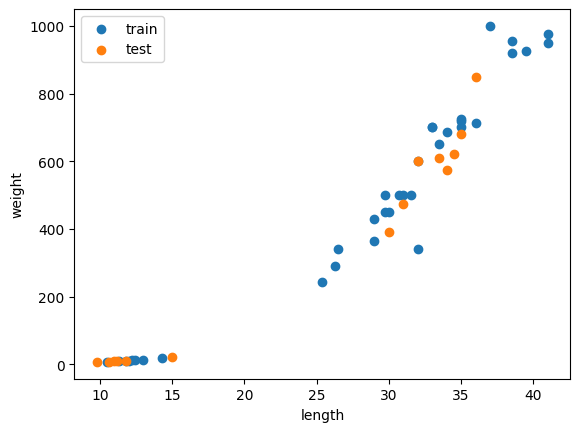

In [47]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:,1], label='train')     # 모든 행의 0번째 열(길이), 1번째 열(무게)를 가져온다는 말이다. 다차원 넘파이 배열만의 접근법인가 보다
plt.scatter(test_input[:, 0], test_input[:,1], label='test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()    # 범례 출력하기
plt.show()

### 위의 학습셋과 테스트셋을 바탕으로 K-최근접 이웃 알고리즘 표현하기

In [52]:
kn.fit(train_input, train_target)    # 학습셋 바탕으로 학습 진행하기
print(kn.score(test_input, test_target))    # 테스트셋 바탕으로 학습 진행하기(1.0의 정확도!)

# 직접 쿼리문 날려서 결과 확인하기(둘다 정확하게 일치한다.)
print(kn.predict(test_input))
print(test_target)

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 2장 전체 소스 코드

In [ ]:
# 전체 코드 작성하기